<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Building-a-Forward-Planning-Agent/blob/master/forward_planning_agent_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!rm planning.xlsx
!wget https://storage.googleapis.com/law1010/AIND_project_3_experiment.xlsx -O planning.xlsx

rm: cannot remove 'planning.xlsx': No such file or directory
--2020-09-18 13:39:00--  https://storage.googleapis.com/law1010/AIND_project_3_experiment.xlsx
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11205 (11K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘planning.xlsx’

planning.xlsx       100%[===================>]  10.94K  --.-KB/s    in 0s      

2020-09-18 13:39:00 (84.6 MB/s) - ‘planning.xlsx’ saved [11205/11205]



In [3]:
xls = pd.ExcelFile('planning.xlsx')
print(type(xls))

<class 'pandas.io.excel._base.ExcelFile'>


Let's see the sheet names

In [4]:
print(xls.sheet_names)

['problem_1', 'problem_2', 'problem _3', 'problem_4']


In [5]:
prob_1 = pd.read_excel('planning.xlsx', sheet_name='problem_1', skiprows=2)
prob_1

,Problem,Algorithm,Actions,Expansions,Goal_tests,New_nodes,Plan_length,Time
0,Air Cargo Problem 1,breadth_first_search,20,43,56,178,6,0.004324
1,Air Cargo Problem 1,depth_first_graph_search,20,21,22,84,20,0.002299
2,Air Cargo Problem 1,uniform_cost_search,20,60,62,240,6,0.006638
3,Air Cargo Problem 1,greedy_best_first_graph_search h_unmet_goals,20,7,9,29,6,0.001128
4,Air Cargo Problem 1,greedy_best_first_graph_search h_pg_levelsum,20,6,8,28,6,0.076109
5,Air Cargo Problem 1,greedy_best_first_graph_search h_pg_maxlevel,20,6,8,24,6,0.053792
6,Air Cargo Problem 1,greedy_best_first_graph_search h_pg_setlevel,20,6,8,28,6,0.261131
7,Air Cargo Problem 1,astar_search h_unmet_goals,20,50,52,206,6,0.006688
8,Air Cargo Problem 1,astar_search h_pg_levelsum,20,28,30,122,6,0.186529
9,Air Cargo Problem 1,astar_search h_pg_maxlevel,20,43,45,180,6,0.198359


For Problem 2:

In [6]:
prob_2 = pd.read_excel('planning.xlsx', sheet_name='problem_2', skiprows=2)
prob_2

,Problem,Algorithm,Actions,Expansions,Goal_tests,New_nodes,Plan_length,Time
0,Air Cargo Problem 2,breadth_first_search,72,3343,4609,30503,9,1.412719
1,Air Cargo Problem 2,depth_first_graph_search,72,624,625,5602,619,1.813666
2,Air Cargo Problem 2,uniform_cost_search,72,5154,5156,46618,9,2.400566
3,Air Cargo Problem 2,greedy_best_first_graph_search h_unmet_goals,72,17,19,170,9,0.014487
4,Air Cargo Problem 2,greedy_best_first_graph_search h_pg_levelsum,72,9,11,86,9,1.578095
5,Air Cargo Problem 2,greedy_best_first_graph_search h_pg_maxlevel,72,27,29,249,9,2.507638
6,Air Cargo Problem 2,greedy_best_first_graph_search h_pg_setlevel,72,9,11,84,9,6.143889
7,Air Cargo Problem 2,astar_search h_unmet_goals,72,2467,2469,22522,9,1.584434
8,Air Cargo Problem 2,astar_search h_pg_levelsum,72,357,359,3426,9,65.294872
9,Air Cargo Problem 2,astar_search h_pg_maxlevel,72,2887,2889,26594,9,261.383882


For problem 3

In [7]:
prob_3 = pd.read_excel('planning.xlsx', sheet_name='problem _3', skiprows=2)
prob_3

,Problem,Algorithm,Actions,Expansions,Goal_tests,New_nodes,Plan_length,Time
0,Air Cargo Problem 3,breadth_first_search,88,14663,18098,129625,12,7.490619
1,Air Cargo Problem 3,depth_first_graph_search,88,408,409,3364,392,0.894157
2,Air Cargo Problem 3,greedy_best_first_graph_search h_unmet_goals,88,25,27,230,15,0.030409
3,Air Cargo Problem 3,greedy_best_first_graph_search h_pg_levelsum,88,14,16,126,14,5.022938
4,Air Cargo Problem 3,astar_search h_unmet_goals,88,7388,7390,65711,12,9.222211
5,Air Cargo Problem 3,astar_search h_pg_levelsum,88,369,371,3403,12,93.623633


For problem 4

In [8]:
prob_4 = pd.read_excel('planning.xlsx', sheet_name='problem_4', skiprows=2)
prob_4

,Problem,Algorithm,Actions,Expansions,Goal_tests,New_nodes,Plan_length,Time
0,Air Cargo Problem 4,breadth_first_search,104,99736,114953,944130,14,72.864881
1,Air Cargo Problem 4,depth_first_graph_search,104,25174,25175,228849,24132,2465.383703
2,Air Cargo Problem 4,greedy_best_first_graph_search h_unmet_goals,104,29,31,280,18,0.037212
3,Air Cargo Problem 4,greedy_best_first_graph_search h_pg_levelsum,104,17,19,165,17,6.834336
4,Air Cargo Problem 4,astar_search h_unmet_goals,104,34330,34332,328509,14,50.453265
5,Air Cargo Problem 4,astar_search h_pg_levelsum,104,1208,1210,12210,15,600.920339


<b><h2>Analysis One: Algorithm Expansion</h2></b>

Analyze the search complexity as a function of domain size, search algorithm, and heuristic.<br>
The report includes a table or chart to analyze the number of nodes expanded against the number of actions in the domain.

* The chart or table includes data for all search & heuristic combinations for air cargo problems 1 and 2.
* The chart or table includes data at least one uninformed search, two heuristics with greedy best first search, and two heuristics with A* on air cargo problems 3 and 4.
* Report includes at least a one paragraph discussion of these results that analyzes the growth trends as the problem size increases

First let's rename the Algorithms tpo make plotting easier

In [53]:
index_12 = ['bfs','dfgs','ucs','gbfgs_ug','gbfgs_ls','gbfgs_ml','gbfgs_sl','a*s_ug','a*s_ls','a*s_ml','a*s_sl']
index_34 = ['bfs', 'dfgs', 'gbfgs_ug', 'gbfgs_ls', 'a*s_ug', 'a*s_ls']

In [135]:
def get_chart(table, select_list=[], new_column=''):
    chart = table.loc[:, select_list]
    actions = table['Actions'][0]
    problem = table['Problem'][0]
    if len(chart) == 11:
        chart.index = index_12
    else:
        chart.index = index_34
    
    # Next, let's get the ratio of Expansions to Actions
    chart[new_column] = chart[select_list[0]] / actions

    # Let's normalize the ratio between 0 and 1 to make plotting easier

    chart[new_column] = np.round(chart[new_column] / np.sum(chart[new_column]),2)
    # Let's drop the columns we don't need for the plot
    chart.drop(select_list, axis=1, inplace=True)
    
    return chart, actions, problem

In [170]:
def plot_bar_chart(chart_1, chart_2, problem, new_column, suptitle1, suptitle2, ylabel):
    plt.figure(figsize=(16,5))
    sns.set(font_scale=1.2)
    sns.set_style('ticks') # change background to white background

    if problem in [1, 2]:
        plt.suptitle(suptitle1, y=1.02)
        # For Problem 1
        plt.subplot(121)
        color_list = ['gold','purple','brown', 'red', 'yellow', 'black', 'aqua', 'pink',
                    'green', 'dimgray', 'crimson']
        plt.bar(x=chart_1.index, height=chart_1[new_column], data=chart_1, color= color_list, linewidth=2, edgecolor='black')
        plt.title(f'{ch1_problem}; Actions = {ch1_actions}')
        plt.xticks(np.arange(len(chart_1)), chart_1.index, rotation='vertical')
        plt.ylabel(ylabel)

        # For Problem 2
        plt.subplot(122)
        plt.bar(x=chart_2.index, height=chart_2[new_column], data=chart_2, color= color_list, linewidth=2, edgecolor='black')
        plt.title(f'{ch2_problem}; Actions = {ch2_actions}')
        plt.xticks(np.arange(len(chart_2)), chart_2.index, rotation='vertical')
        plt.ylabel(ylabel)

    else:
        plt.suptitle(suptitle2, y=1.02)
        # For Problem 1
        plt.subplot(121)
        color_list = ['crimson','purple','brown', 'red', 'yellow', 'black']
        plt.bar(x=chart_1.index, height=chart_1[new_column], data=chart_1, color= color_list, linewidth=2, edgecolor='black')
        plt.title(f'{ch1_problem}; Actions = {ch1_actions}')
        plt.xticks(np.arange(len(chart_1)), chart_1.index, rotation='vertical')
        plt.ylabel(ylabel)

        # For Problem 2
        plt.subplot(122)
        plt.bar(x=chart_2.index, height=chart_2[new_column], data=chart_2, color= color_list, linewidth=2, edgecolor='black')
        plt.title(f'{ch2_problem}; Actions = {ch2_actions}')
        plt.xticks(np.arange(len(chart_2)), chart_2.index, rotation='vertical')
        plt.ylabel(ylabel)
    
    plt.show()
    

In [172]:
new_col = 'Expansions/Actions_Ratio'
suptitle1 = 'Expansions/Actions Ratios for Air Cargo Problems 1 and 2'
suptitle2 = 'Expansions/Actions Ratios for Air Cargo Problems 3 and 4'
ylabel = 'Exp/Act Ratio'

chart_1, ch1_actions, ch1_problem = get_chart(prob_1, ['Expansions', 'Actions'], new_col)
chart_2, ch2_actions, ch2_problem = get_chart(prob_2, ['Expansions', 'Actions'], new_col)

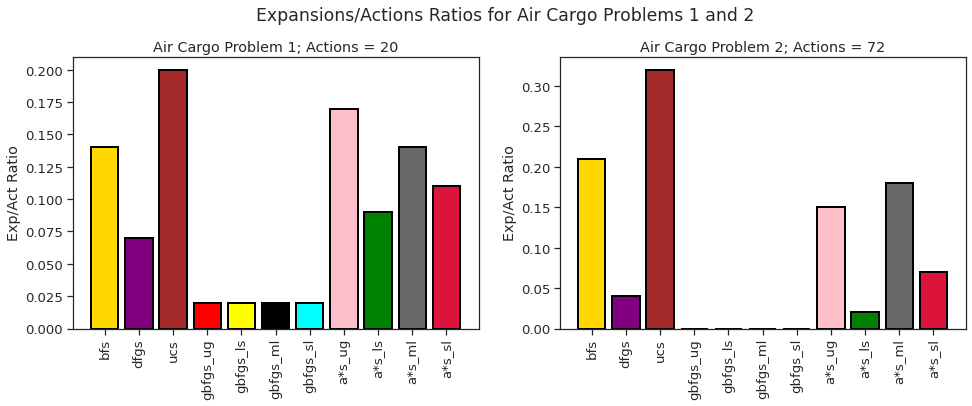

In [173]:
plot_bar_chart(chart_1, chart_2, 2, new_col, suptitle1, suptitle2, ylabel)

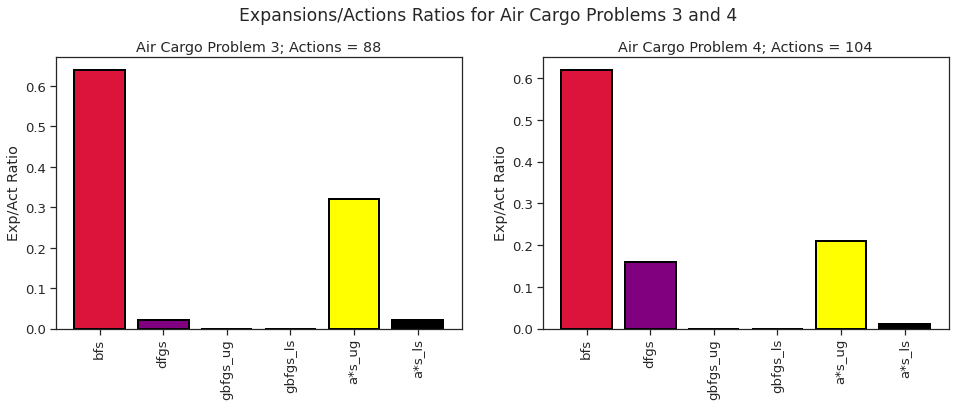

In [174]:
chart_1, ch1_actions, ch1_problem = get_chart(prob_3, ['Expansions', 'Actions'], new_col)
chart_2, ch2_actions, ch2_problem = get_chart(prob_4, ['Expansions', 'Actions'], new_col)
plot_bar_chart(chart_1, chart_2, 3, new_col, suptitle1, suptitle2, ylabel)

<b><h2>Analysis Two: Algorithm Time</h2></b>

Analyze search time as a function of domain size, search algorithm, and heuristic.<br>
The report includes a table or chart to analyze the search time against the number of actions in the domain.

* The chart or table includes data for all search & heuristic combinations for air cargo problems 1 and 2.
* The chart or table includes data at least one uninformed search, two heuristics with greedy best first search, and two heuristics with A* on air cargo problems 3 and 4.
* Report includes at least a one paragraph discussion of these results that analyzes the growth trends as the problem size increases

In [175]:
new_col = 'Time/Actions_Ratio'
suptitle1 = 'Time/Actions Ratios for Air Cargo Problems 1 and 2'
suptitle2 = 'Time/Actions Ratios for Air Cargo Problems 3 and 4'
ylabel = 'Time/Act Ratio'

chart_1, ch1_actions, ch1_problem = get_chart(prob_1, ['Time', 'Actions'], new_col)
chart_2, ch2_actions, ch2_problem = get_chart(prob_2, ['Time', 'Actions'], new_col)

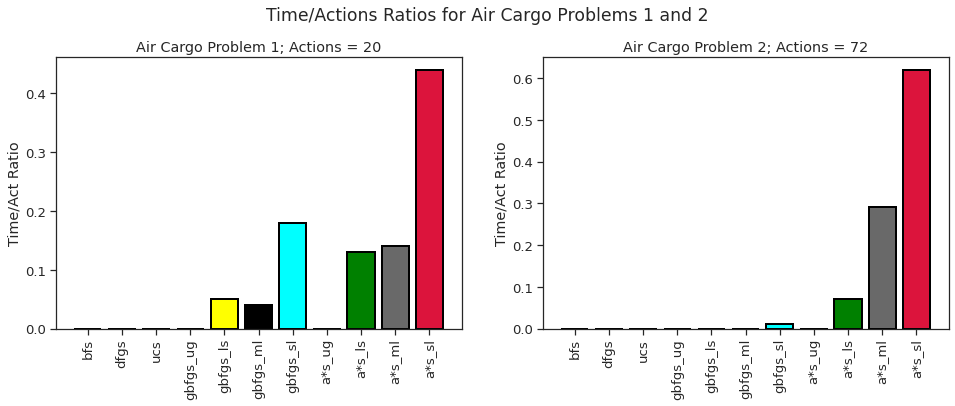

In [176]:
plot_bar_chart(chart_1, chart_2, 2, new_col, suptitle1, suptitle2, ylabel)

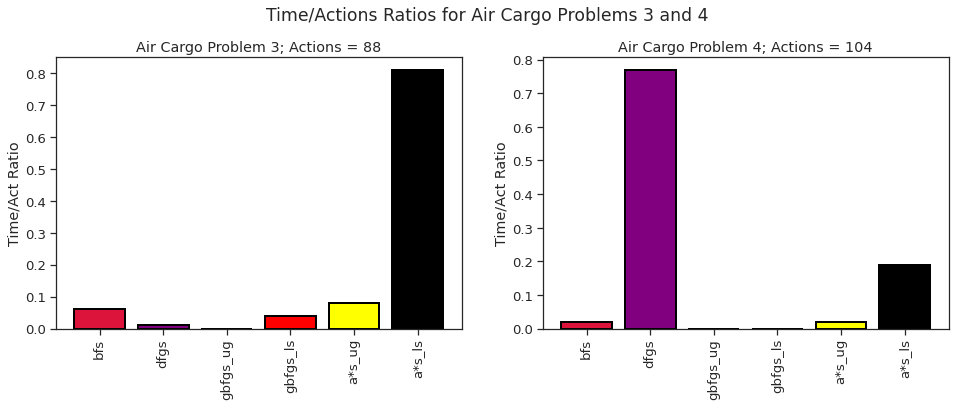

In [177]:
chart_1, ch1_actions, ch1_problem = get_chart(prob_3, ['Time', 'Actions'], new_col)
chart_2, ch2_actions, ch2_problem = get_chart(prob_4, ['Time', 'Actions'], new_col)
plot_bar_chart(chart_1, chart_2, 3, new_col, suptitle1, suptitle2, ylabel)

<b><h2>Analysis 3: Algorithm Plan-length</h2></b>

Analyze the optimality of solution as a function of domain size, search algorithm, and heuristic. The Report includes a table or chart to analyze the length of the plans returned by each algorithm on all search problems.

* The chart or table includes data for all search & heuristic combinations for air cargo problems 1 and 2
* The chart or table includes data at least one uninformed search, two heuristics with greedy best-first search, and two heuristics with A* on air cargo problems 3 and 4
* The report includes at least a one-paragraph discussion of these results that analyzes the growth trends as the problem size increases



In [179]:
new_col = 'Plan-Length/Actions_Ratio'
suptitle1 = 'Plan-Length/Actions Ratios for Air Cargo Problems 1 and 2'
suptitle2 = 'Plan-Length/Actions Ratios for Air Cargo Problems 3 and 4'
ylabel = 'Plan/Act Ratio'

In [180]:
chart_1, ch1_actions, ch1_problem = get_chart(prob_1, ['Plan_length', 'Actions'], new_col)
chart_2, ch2_actions, ch2_problem = get_chart(prob_2, ['Plan_length', 'Actions'], new_col)

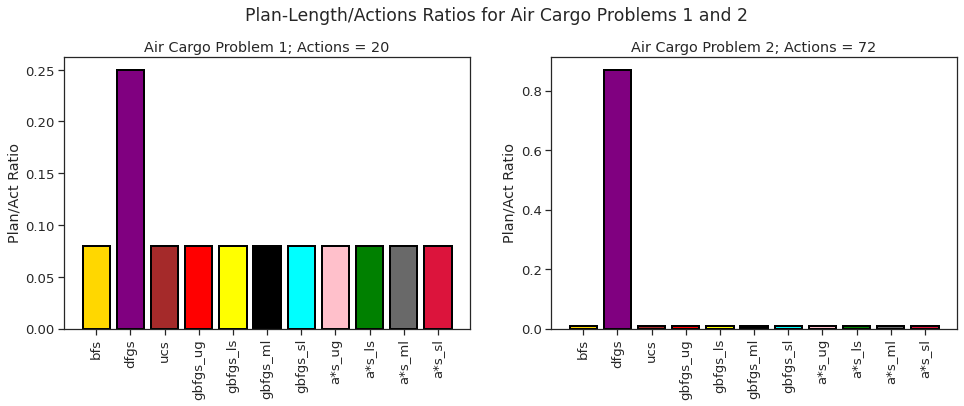

In [182]:
plot_bar_chart(chart_1, chart_2, 1, new_col, suptitle1, suptitle2, ylabel)

In [183]:
chart_1, ch1_actions, ch1_problem = get_chart(prob_3, ['Plan_length', 'Actions'], new_col)
chart_2, ch2_actions, ch2_problem = get_chart(prob_4, ['Plan_length', 'Actions'], new_col)

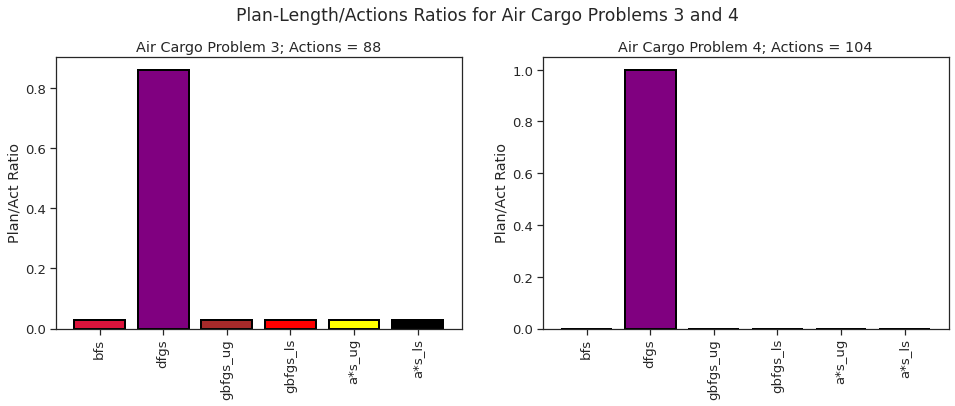

In [185]:
plot_bar_chart(chart_1, chart_2, 3, new_col, suptitle1, suptitle2, ylabel)